# Inhibitor Diffusion and Germination - Multiple Spores

## Numerical experiments - Week 50/2024

_Boyan Mihaylov, MSc Computational Science (UVA/VU)_

## Prerequisite libraries

From this point on, the code is structured in Python modules, which are imported into the notebooks.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from numba import jit, cuda, float32
# import matplotlib.gridspec as gridspec

from importlib import reload
import setup as st
import diffusion as df
import conversions as conv
import plotting as pt

d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:31: SyntaxWarning: invalid escape sequence '\m'
  ax.set_xlabel('$x$ [$\mu$m]')
d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:32: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('$y$ [$\mu$m]')
d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:36: SyntaxWarning: invalid escape sequence '\m'
  ax.set_zlabel('$z$ [$\mu$m]')


## 1. Compilation of previous experiments

For the sake of better comparison, the experiments from the previous notebooks, plus an additional one using the permeation coefficient for glucose through a rodlet layer with the properties of a cellulose nanofibril (CNF) film, are repeated under the same framework, combining and saving the results. These include:

- Superficial release - concentration in cell wall volume:
    - 2D, $D$ of glucose/water;
    - 3D, $D$ of glucose/water;

- Release through barrier:
    - 2D, $P_s$ of lipid bilayer membrane, concentration in cell wall volume;
    - 3D, $P_s$ of lipid bilayer membrane, concentration in cell wall volume;
    - 2D, $P_s$ of CNF film, concentration in cell wall volume;
    - 3D, $P_s$ of CNF film, concentration in cell wall volume;
    - 2D, $P_s$ analytically fitted, concentration in cell wall volume;
    - 3D, $P_s$ analytically fitted, concentration in cell wall volume;

To estimate $P_s$ of the quasi-rodlet layer, the diffusion coefficient needs to be converted to a permeation constant using the supposed thickness of a rodlet layer $d=2$ nm and the octanol-water partition coefficient of glucose $K=10^{-3}$ (since the preference toward hydrophobins is assumed to be similar to the preference to lipids).

In [3]:
reload(st)
reload(df)
reload(conv)
reload(pt)

<module 'plotting' from 'd:\\MSc Computational Science\\Master Thesis\\msc-thesis\\Code\\plotting.py'>

In [4]:
d_rod = 0.002 # microns
K = 1e-3

D_glu_w = 600 # microns^2/s
D_glu_c = 17 # microns^2/s
Ps_lip = 1.9e-6 # microns/s
Ps_rod = conv.convert_D_to_Ps(D_glu_c, K, d_rod)
print(f"Permeation coefficient of quasi-rodlet layer: {Ps_rod} um/s")
Ps_fit = 0.0002675353069511818 # microns/s

# Cell wall and spore parameters
V_spore = 125 # microns^3
V_cell_wall = 19.5 # microns^3
c_spore = 1.018#6.52 # M
c_cell_wall = 1.018 # M

# Experiment parameters
# global_id = '241219'
global_id = 'ss_250107'
exp_params = [
    {'expID': global_id, 'simID': 'A1', 'label':'$D^{\\text{glu/w}}$, 2D', 'dims': 2, 'D': D_glu_w, 'Ps': None, 'c0': c_cell_wall},
    {'expID': global_id, 'simID': 'A2', 'label':'$D^{\\text{glu/w}}$, 3D', 'dims': 3, 'D': D_glu_w, 'Ps': None, 'c0': c_cell_wall},
    {'expID': global_id, 'simID': 'B1', 'label':'$P_s^{\\text{glu/lip}}$, 2D', 'dims': 2, 'D': None, 'Ps': Ps_lip, 'c0': c_spore},
    {'expID': global_id, 'simID': 'B2', 'label':'$P_s^{\\text{glu/lip}}$, 3D', 'dims': 3, 'D': None, 'Ps': Ps_lip, 'c0': c_spore},
    {'expID': global_id, 'simID': 'B3', 'label':'$P_s^{\\text{glu/c}}$, 2D', 'dims': 2, 'D': None, 'Ps': Ps_rod, 'c0': c_cell_wall},
    {'expID': global_id, 'simID': 'B4', 'label':'$P_s^{\\text{glu/c}}$, 3D', 'dims': 3, 'D': None, 'Ps': Ps_rod, 'c0': c_cell_wall},
    {'expID': global_id, 'simID': 'B5', 'label':'$P_s^{\\text{fit}}$, 2D', 'dims': 2, 'D': None, 'Ps': Ps_fit, 'c0': c_cell_wall},
    {'expID': global_id, 'simID': 'B6', 'label':'$P_s^{\\text{fit}}$, 3D', 'dims': 3, 'D': None, 'Ps': Ps_fit, 'c0': c_cell_wall}
    ]

# General simulation parameters
t_max = 1#14400 # seconds
N = 255
dt = 0.005
dx = 5 # microns
n_save_frames = 1000
c_thresh_factors = 10.0**(-np.arange(1, 7))

# Run simulations
st.run_diffusion_experiments_single_spore(exp_params, t_max, N, dt, dx, n_save_frames, V_spore, c_thresh_factors)

Permeation coefficient of quasi-rodlet layer: 8.5 um/s
A1: Running simulation $D^{\text{glu/w}}$, 2D
Using D = 600, Db = 600, Ps = None
Simulation running for 200 steps on a lattice of size [1280 1280] microns.


c:\Users\mihbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 64 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
c:\Users\mihbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
d:\MSc Computational Science\Master Thesis\msc-thesis\Code\diffusion.py:31: RuntimeWarning: divide by zero encountered in divide
  result = np.power(vol * c_init, 2/3) / (4*np.pi*D*time)


A2: Running simulation $D^{\text{glu/w}}$, 3D
Using D = 600, Db = 600, Ps = None
Simulation running for 200 steps on a lattice of size [1280 1280 1280] microns.


d:\MSc Computational Science\Master Thesis\msc-thesis\Code\diffusion.py:33: RuntimeWarning: divide by zero encountered in divide
  result = vol * c_init / np.power(4*np.pi*D*time, 1.5)


B1: Running simulation $P_s^{\text{glu/lip}}$, 2D
Using D = 600, Db = 1.9e-06, Ps = 1.9e-06
Simulation running for 200 steps on a lattice of size [1280 1280] microns.
B2: Running simulation $P_s^{\text{glu/lip}}$, 3D
Using D = 600, Db = 9.5e-06, Ps = 1.9e-06
Simulation running for 200 steps on a lattice of size [1280 1280 1280] microns.
B3: Running simulation $P_s^{\text{glu/c}}$, 2D
Using D = 600, Db = 8.5, Ps = 8.5
Simulation running for 200 steps on a lattice of size [1280 1280] microns.
B4: Running simulation $P_s^{\text{glu/c}}$, 3D
Using D = 600, Db = 42.5, Ps = 8.5
Simulation running for 200 steps on a lattice of size [1280 1280 1280] microns.
B5: Running simulation $P_s^{\text{fit}}$, 2D
Using D = 600, Db = 0.0007745791459416563, Ps = 0.0007745791459416563
Simulation running for 200 steps on a lattice of size [1280 1280] microns.
B6: Running simulation $P_s^{\text{fit}}$, 3D
Using D = 600, Db = 0.0038728957297082815, Ps = 0.0007745791459416563
Simulation running for 200 steps o

In [7]:
reload(pt)

d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:31: SyntaxWarning: invalid escape sequence '\m'
  ax.set_xlabel('$x$ [$\mu$m]')
d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:32: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('$y$ [$\mu$m]')
d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:36: SyntaxWarning: invalid escape sequence '\m'
  ax.set_zlabel('$z$ [$\mu$m]')


<module 'plotting' from 'd:\\MSc Computational Science\\Master Thesis\\msc-thesis\\Code\\plotting.py'>

Plotting simulation A1: $D^{\text{glu/w}}$, 2D
Plotting simulation A2: $D^{\text{glu/w}}$, 3D
Plotting simulation B1: $P_s^{\text{glu/lip}}$, 2D
Plotting simulation B2: $P_s^{\text{glu/lip}}$, 3D
Plotting simulation B3: $P_s^{\text{glu/c}}$, 2D
Plotting simulation B4: $P_s^{\text{glu/c}}$, 3D
Plotting simulation B5: $P_s^{\text{fit}}$, 2D
Plotting simulation B6: $P_s^{\text{fit}}$, 3D


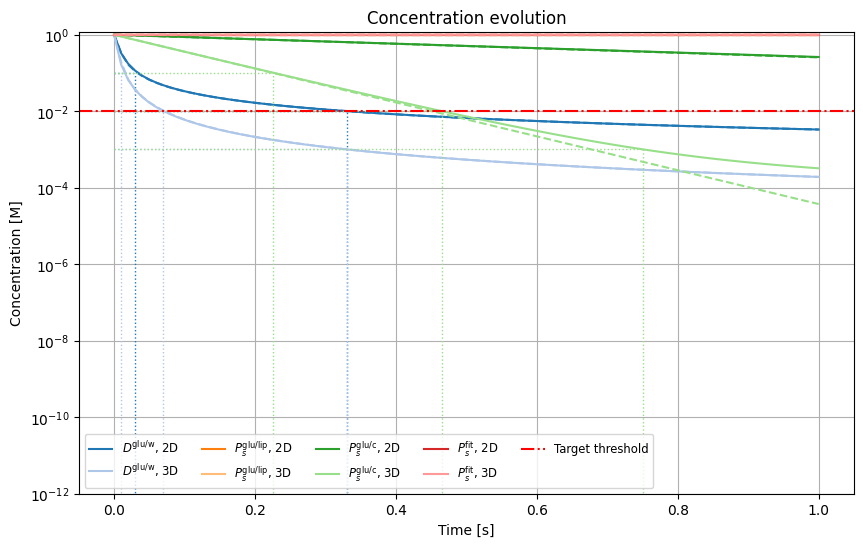

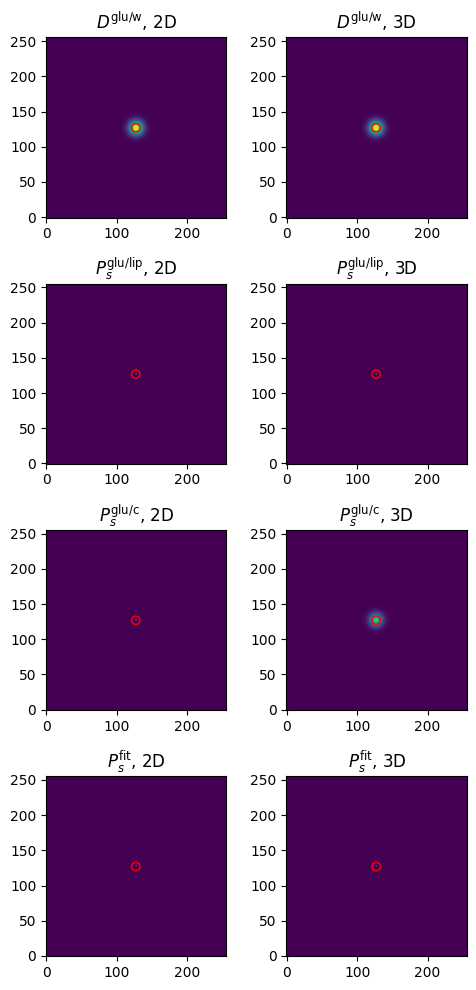

In [8]:
global_id = 'ss_250107'
# pt.plot_experiment_results(global_id, select_sims=['A1', 'A2', 'B3', 'B4'], semilogy=True, target_thresh=0.01)
# pt.plot_experiment_results(global_id, select_sims=['A1', 'A2'], semilogy=True, target_thresh=0.01)
# pt.plot_experiment_results(global_id, select_sims=['B3', 'B4'], semilogy=True, target_thresh=0.01)
# pt.plot_experiment_results(global_id, select_sims=['B5', 'B6'], semilogy=True, target_thresh=0.01)
# pt.plot_experiment_results(global_id, select_sims=['B3', 'B4', 'A1', 'A2'], semilogy=True, target_thresh=0.01)
# pt.plot_experiment_results(global_id, select_sims=['B1', 'B2', 'B5', 'B2'], semilogy=True, target_thresh=0.01)
# pt.plot_experiment_results(global_id, select_sims=['B1', 'B2', 'B5', 'B2'], semilogy=True, target_thresh=1)
pt.plot_experiment_results(global_id, logy=True, target_thresh=0.01, color_pairs=True)

In [31]:
reload(pt)
reload(st)

d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:31: SyntaxWarning: invalid escape sequence '\m'
  ax.set_xlabel('$x$ [$\mu$ m]')
d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:32: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('$y$ [$\mu$ m]')
d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:36: SyntaxWarning: invalid escape sequence '\m'
  ax.set_zlabel('$z$ [$\mu$ m]')


<module 'setup' from 'd:\\MSc Computational Science\\Master Thesis\\msc-thesis\\Code\\setup.py'>

## 2. Spore arrays

In [21]:
N = 256
H = 512
dx = 5
spore_density_base = 1/3 * 10**5 # spores per mL
density_factors = 2**np.arange(0, 4, 1)
# spore_density_exponents = np.arange(5, 10, 1)
# spore_densities = 10**spore_density_exponents
spore_densities = spore_density_base * density_factors
print(spore_densities)

# Uniform spore grid
print("Populating uniform 3D spore grid")
spore_coords_all = []
spore_spacing_all = []

for spore_density in spore_densities:
    spore_density = conv.inverse_mL_to_micrometers_cubed(spore_density)
    spore_coords, spore_spacing = st.populate_spore_grid_coords(N, dx, spore_density)
    spore_coords_all.append(spore_coords)
    spore_spacing_all.append(spore_spacing)

# Spores at the bottom of grid
print("Populating uniform 2D spore grid at bottom of lattice")
spore_coords_all_bottom = []
spore_spacing_all_bottom = []

for spore_density in spore_densities:
    spore_density = conv.inverse_mL_to_micrometers_cubed(spore_density)
    spore_coords, spore_spacing = st.populate_spore_grid_coords(N, dx, spore_density, H)
    spore_coords_all_bottom.append(spore_coords)
    spore_spacing_all_bottom.append(spore_spacing)

[ 33333.33333333  66666.66666667 133333.33333333 266666.66666667]
Populating uniform 3D spore grid
Conversion: 3.33333333333333E-8 micrometers^-3
Effective density: 3.333333253863202e-08 spores/micrometer^3
Populating volume of 2121824125 micrometers^3 with 70.72746914711692 spores, 4 spores per dimension
Spore spacing: 321.25 micrometers
Conversion: 6.66666666666667E-8 micrometers^-3
Effective density: 6.666666507726404e-08 spores/micrometer^3
Populating volume of 2121824125 micrometers^3 with 141.45493829423384 spores, 5 spores per dimension
Spore spacing: 257.0 micrometers
Conversion: 1.33333333333333E-7 micrometers^-3
Effective density: 1.3333333015452808e-07 spores/micrometer^3
Populating volume of 2121824125 micrometers^3 with 282.9098765884677 spores, 6 spores per dimension
Spore spacing: 214.16666666666666 micrometers
Conversion: 2.66666666666667E-7 micrometers^-3
Effective density: 2.6666666030905617e-07 spores/micrometer^3
Populating volume of 2121824125 micrometers^3 with 56

In [17]:
reload(pt)

d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:31: SyntaxWarning: invalid escape sequence '\m'
  ax.set_xlabel('$x$ [$\mu$ m]')
d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:32: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('$y$ [$\mu$ m]')
d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:36: SyntaxWarning: invalid escape sequence '\m'
  ax.set_zlabel('$z$ [$\mu$ m]')


<module 'plotting' from 'd:\\MSc Computational Science\\Master Thesis\\msc-thesis\\Code\\plotting.py'>

<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
C:\Users\mihbo\AppData\Local\Temp\ipykernel_5320\4115076779.py:3: SyntaxWarning: invalid escape sequence '\m'
  title=f'{np.format_float_scientific(np.round(spore_densities[i], 1))} spores/mL, spore spacing: {round(spore_spacing_all[i])} $\mu$m', top_view=True)
C:\Users\mihbo\AppData\Local\Temp\ipykernel_5320\4115076779.py:5: SyntaxWarning: invalid escape sequence '\m'
  title=f'{np.format_float_scientific(np.round(spore_densities[i], 1))} spores/mL, spore spacing: {round(spore_spacing_all[i])} $\mu$m', top_view=False)


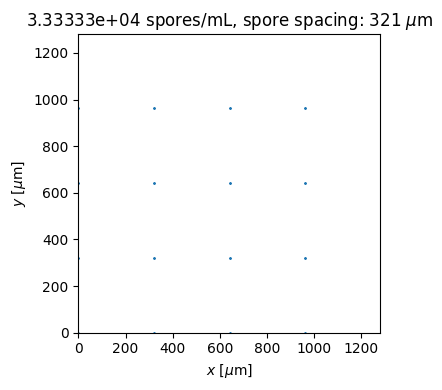

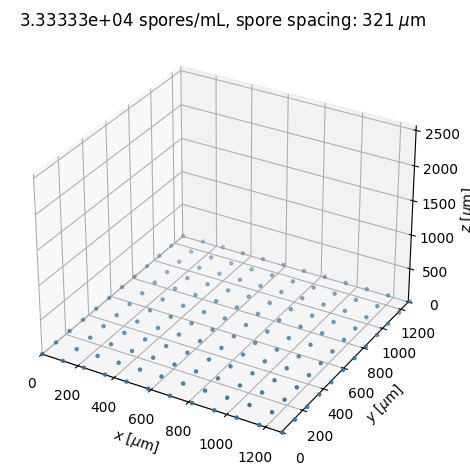

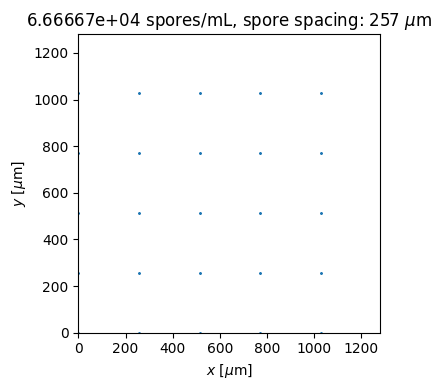

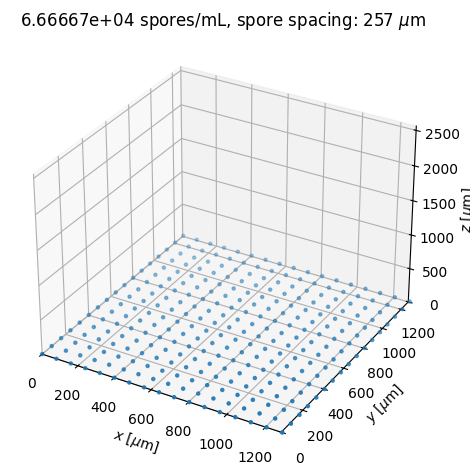

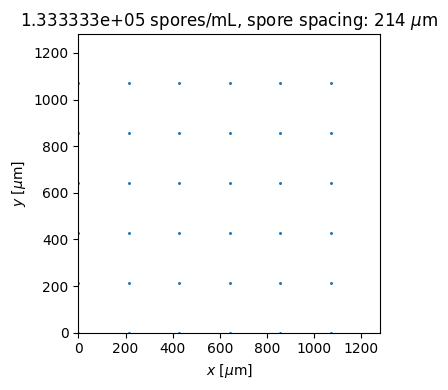

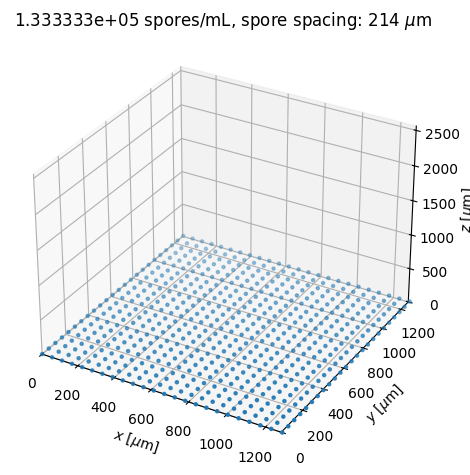

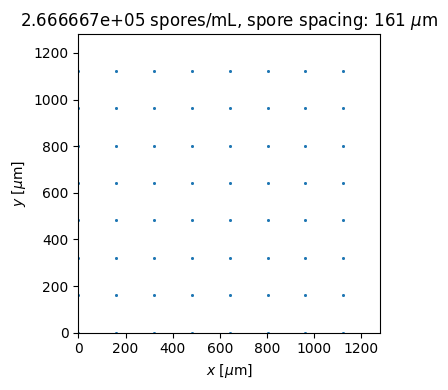

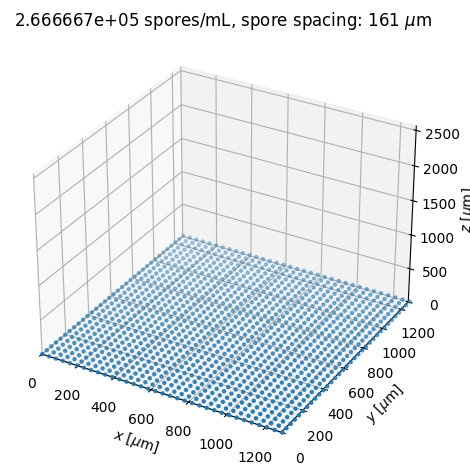

In [22]:
for i, spore_coords in enumerate(spore_coords_all):
    pt.plot_spore_positions(N, H, spore_coords[0], spore_coords[1], spore_coords[2], dx,
                            title=f'{np.format_float_scientific(np.round(spore_densities[i], 1))} spores/mL, spore spacing: {round(spore_spacing_all[i])} $\mu$m', top_view=False)
    pt.plot_spore_positions(N, H, spore_coords_all_bottom[i][0], spore_coords_all_bottom[i][1], spore_coords_all_bottom[i][2], dx,
                            title=f'{np.format_float_scientific(np.round(spore_densities[i], 1))} spores/mL, spore spacing: {round(spore_spacing_all[i])} $\mu$m', top_view=False)

## 3. Multi-spore experiments

In [42]:
reload(df)
reload(st)

<module 'setup' from 'd:\\MSc Computational Science\\Master Thesis\\msc-thesis\\Code\\setup.py'>

In [104]:
# Use fitted permeation coefficient
Ps_fit = 0.0002675353069511818 # microns/s

# Cell wall and spore parameters
V_spore = 125 # microns^3
V_cell_wall = 19.5 # microns^3
c_spore = 1.018#6.52 # M
c_cell_wall = 1.018 # M

# General simulation parameters
t_max = 14400 # seconds
N = 255
dt = 0.005
dx = 5 # microns
n_save_frames = 100
c_thresh_factors = 10.0**(-np.arange(1, 7))

# Input spore densities
spore_density_base = 1/3 * 10**5 # spores per mL
density_factors = 2**np.arange(0, 4, 1)
spore_densities = spore_density_base * density_factors

# Uniform spore grid
# print("Populating uniform 3D spore grid")
# spore_coords_all = []
# spore_spacing_all = []

# for spore_density in spore_densities:
#     spore_density = conv.inverse_mL_to_micrometers_cubed(spore_density)
#     spore_coords, spore_spacing = st.populate_spore_grid_coords(N, dx, spore_density)
#     spore_coords_all.append(spore_coords)
#     spore_spacing_all.append(spore_spacing)

# Experiment parameters
# global_id = '241219'
# global_id = 'ms_250107'
# exp_params = [
#     {'expID': global_id, 'simID': 'D1', 'label':r'$3.33\times 10^4$ spores/mL', 'dims': 3, 'D': None, 'Ps': Ps_fit, 'c0': c_cell_wall, 'spore_spacing': spore_spacing_all[0]},
#     {'expID': global_id, 'simID': 'D2', 'label':r'$6.67\times 10^4$ spores/mL', 'dims': 3, 'D': None, 'Ps': Ps_fit, 'c0': c_cell_wall, 'spore_spacing': spore_spacing_all[1]},
#     {'expID': global_id, 'simID': 'D3', 'label':r'$1.33\times 10^5$ spores/mL', 'dims': 3, 'D': None, 'Ps': Ps_fit, 'c0': c_cell_wall, 'spore_spacing': spore_spacing_all[2]},
#     {'expID': global_id, 'simID': 'D4', 'label':r'$2.67\times 10^5$ spores/mL', 'dims': 3, 'D': None, 'Ps': Ps_fit, 'c0': c_cell_wall, 'spore_spacing': spore_spacing_all[3]}
#     ]
global_id = 'ms_250108'
exp_params = [
    {'expID': global_id, 'simID': 'D1', 'label':r'$3.33\times 10^4$ spores/mL', 'dims': 3, 'D': None, 'Ps': Ps_fit, 'c0': c_cell_wall, 'spore_density': spore_densities[0]},
    {'expID': global_id, 'simID': 'D2', 'label':r'$6.67\times 10^4$ spores/mL', 'dims': 3, 'D': None, 'Ps': Ps_fit, 'c0': c_cell_wall, 'spore_density': spore_densities[1]},
    {'expID': global_id, 'simID': 'D3', 'label':r'$1.33\times 10^5$ spores/mL', 'dims': 3, 'D': None, 'Ps': Ps_fit, 'c0': c_cell_wall, 'spore_density': spore_densities[2]},
    {'expID': global_id, 'simID': 'D4', 'label':r'$2.67\times 10^5$ spores/mL', 'dims': 3, 'D': None, 'Ps': Ps_fit, 'c0': c_cell_wall, 'spore_density': spore_densities[3]}
    ]

# Run simulations
st.run_diffusion_experiments_multi_spore(exp_params, t_max, dt, dx, n_save_frames, V_spore, c_thresh_factors)

Conversion: 3.33333333333333E-8 micrometers^-3
D1: Running simulation $3.33\times 10^4$ spores/mL on lattice with size 63
3D simulation
Using D = 600, Db = 0.0013376765347559091, Ps = 0.0002675353069511818
Simulation running for 2880000 steps on a lattice of size [320 320 320] microns.
0.0098268003971253
Conversion: 6.66666666666667E-8 micrometers^-3
D2: Running simulation $6.67\times 10^4$ spores/mL on lattice with size 50
3D simulation
Using D = 600, Db = 0.0013376765347559091, Ps = 0.0002675353069511818
Simulation running for 2880000 steps on a lattice of size [255 255 255] microns.
0.009830318044904255
Conversion: 1.33333333333333E-7 micrometers^-3
D3: Running simulation $1.33\times 10^5$ spores/mL on lattice with size 40
3D simulation
Using D = 600, Db = 0.0013376765347559091, Ps = 0.0002675353069511818
Simulation running for 2880000 steps on a lattice of size [205 205 205] microns.
0.009836903155776039
Conversion: 2.66666666666667E-7 micrometers^-3
D4: Running simulation $2.67\ti

## 4. Experiment results

In [102]:
reload(pt)

d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:31: SyntaxWarning: invalid escape sequence '\m'
  ax.set_xlabel('$x$ [$\mu$m]')
d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:32: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('$y$ [$\mu$m]')
d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:36: SyntaxWarning: invalid escape sequence '\m'
  ax.set_zlabel('$z$ [$\mu$m]')


<module 'plotting' from 'd:\\MSc Computational Science\\Master Thesis\\msc-thesis\\Code\\plotting.py'>

Plotting simulation D1: $3.33\times 10^4$ spores/mL
Plotting simulation D2: $6.67\times 10^4$ spores/mL
Plotting simulation D3: $1.33\times 10^5$ spores/mL
Plotting simulation D4: $2.67\times 10^5$ spores/mL


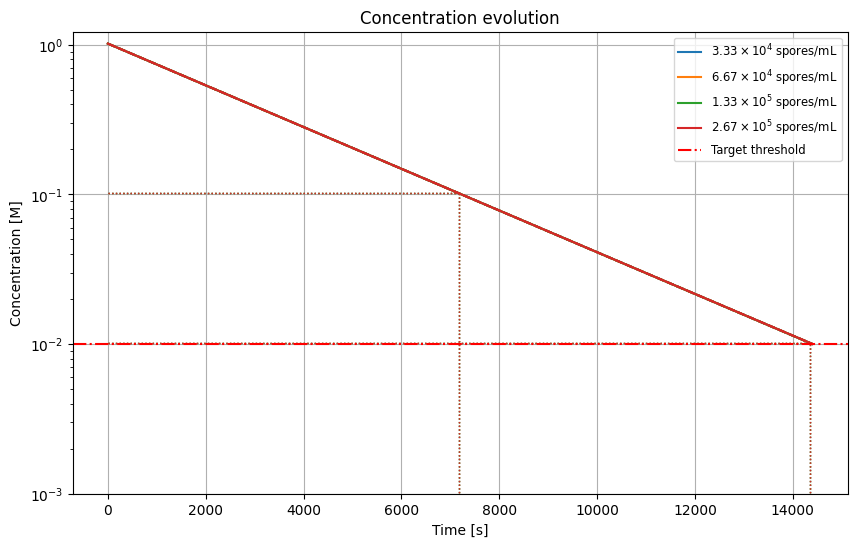

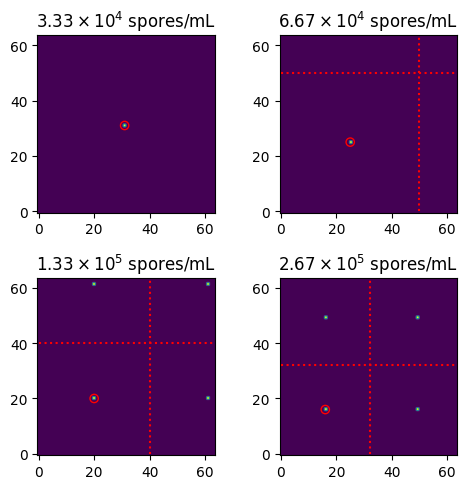

In [105]:
global_id = 'ms_250108'
pt.plot_periodic_experiment_results(global_id, logy=True, target_thresh=0.01, mark_spore=True)

### Triangular grid of spores

In [401]:
reload(pt)
reload(st)

<module 'setup' from 'd:\\MSc Computational Science\\Master Thesis\\msc-thesis\\Code\\setup.py'>

In [402]:
N = 256
H = 512
dx = 5
spore_density_exponents = np.arange(5, 10, 1)
spore_densities = 10**spore_density_exponents
spore_density = 1e5#1e9 # spores per mL

spore_coords_all = []
spore_spacing_all = []

for spore_density in spore_densities:
    spore_density = conv.inverse_mL_to_micrometers_cubed(spore_density)
    spore_coords, spore_spacing = st.populate_spore_tri_coords(N, dx, spore_density, H)
    spore_coords_all.append(spore_coords)
    spore_spacing_all.append(spore_spacing)

Conversion: 1.00000000000000E-7 micrometers^-3
Effective density: 9155273116531756.0 spores/micrometer^3
Conversion: 0.00000100000000000000 micrometers^-3
Effective density: 9155273506844.53 spores/micrometer^3
Conversion: 0.0000100000000000000 micrometers^-3
Effective density: 9155274131.345016 spores/micrometer^3
Conversion: 0.000100000000000000 micrometers^-3
Effective density: 9155274.131345017 spores/micrometer^3
Conversion: 0.00100000000000000 micrometers^-3
Effective density: 9155.272132943663 spores/micrometer^3


In [400]:
print(spore_coords_all[-1])

[]


<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
C:\Users\mihbo\AppData\Local\Temp\ipykernel_18264\1715446649.py:3: SyntaxWarning: invalid escape sequence '\m'
  title=f'$10^{spore_density_exponents[i]}$ spores/mL, spore spacing: {round(spore_spacing_all[i])} $\mu$m', top_view=True)


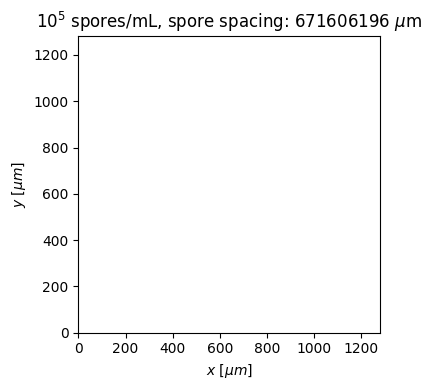

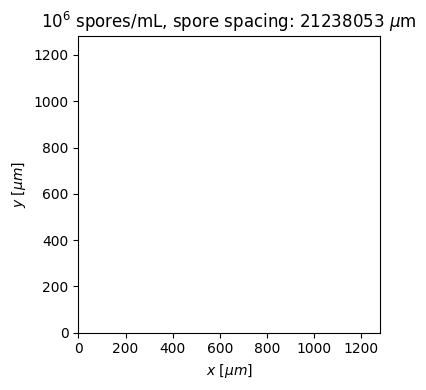

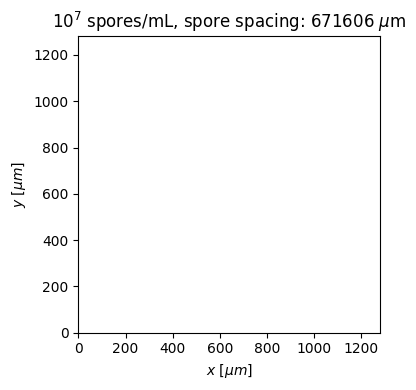

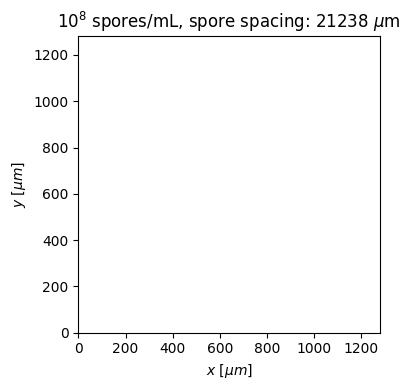

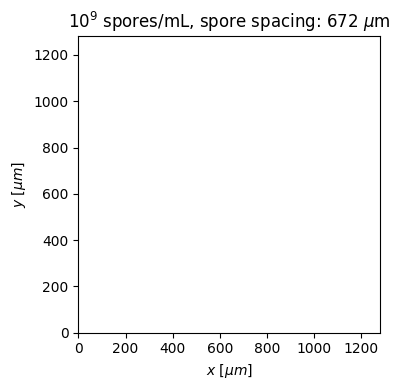

In [403]:
for i, spore_coords in enumerate(spore_coords_all):
    pt.plot_spore_positions(N, H, spore_coords[0], spore_coords[1], spore_coords[2], dx,
                            title=f'$10^{spore_density_exponents[i]}$ spores/mL, spore spacing: {round(spore_spacing_all[i])} $\mu$m', top_view=True)